In [4]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(tidyr)
library(reshape2)
library(cowplot)
library(latex2exp)
options(repr.plot.width = 12, repr.plot.height = 8)

In [139]:
analysis <- function(X, Y, display_plot=TRUE){
    spearman <- cor(X, Y, use="pairwise.complete.obs", method="spearman")
    pearson <- cor(X, Y, use="pairwise.complete.obs", method="pearson")
    print(c("Pearson", pearson))
    print(c("Spearman", spearman))
    if (display_plot) {
        ggplot() + geom_point(aes(x=X, y=Y))
    }
}

regression <- function(X, Y, display_plot=TRUE){
    r <- cor(X, Y, use="pairwise.complete.obs")
    Sx <- sd(X)
    Sy <- sd(Y)
    a <- r * Sy / Sx
    b <- mean(Y) - a * mean(X)

    if(display_plot){
        xs <- seq(min(X), max(X), 0.01)
        plt <- ggplot() +
            geom_point(aes(x=X, y=Y), alpha=0.5) +
            geom_line(aes(x = xs, y = a * xs + b), linewidth=1, col="red")
        show(plt)
    }

    return(c(a, b))
}

cor_plot <- function(Xt, type="acf", h=30){
    cors <- acf(Xt, plot=FALSE, lag.max=h)
    pcors <- pacf(Xt, plot=FALSE, lag.max=h)

    if (type == "acf"){
        plt <- ggplot() + 
            geom_point(aes(cors$lag, cors$acf), size=3, col="blue", alpha=0.5) + ggtitle("ACF") +
            geom_line(aes(cors$lag, 0), col="#006bc398", size=1) +
            theme(plot.title = element_text(hjust = 0.5)) +
            xlab("h") +
            ylab("")
    }
    if (type == "pacf"){
        plt <- ggplot() +
            geom_point(aes(pcors$lag, pcors$acf), size=3, col="blue", alpha=0.5) + ggtitle("PACF") +
            geom_point(aes(0, 1), size=3, col="blue", alpha=0.5) +
            geom_line(aes(cors$lag, 0), col="#006bc398", size=1) +
            theme(plot.title = element_text(hjust = 0.5)) +
            xlab("h") +
            ylab("")
    }
    show(plt)
}

In [8]:
data <- read.csv("data/data.csv")
data

day_number,region,country,state,city,month,day,year,temp
<int>,<chr>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<dbl>
1,Europe,Poland,NA,Warsaw,1,1,1995,35.4
2,Europe,Poland,NA,Warsaw,1,2,1995,30.5
3,Europe,Poland,NA,Warsaw,1,3,1995,27.2
4,Europe,Poland,NA,Warsaw,1,4,1995,22.9
5,Europe,Poland,NA,Warsaw,1,5,1995,18.7
6,Europe,Poland,NA,Warsaw,1,6,1995,19.7
7,Europe,Poland,NA,Warsaw,1,7,1995,21.6
8,Europe,Poland,NA,Warsaw,1,8,1995,26.6
9,Europe,Poland,NA,Warsaw,1,9,1995,27.4


In [15]:
new_data <- data[2730:4622,]
day <- new_data$day_number
temp <- new_data$temp

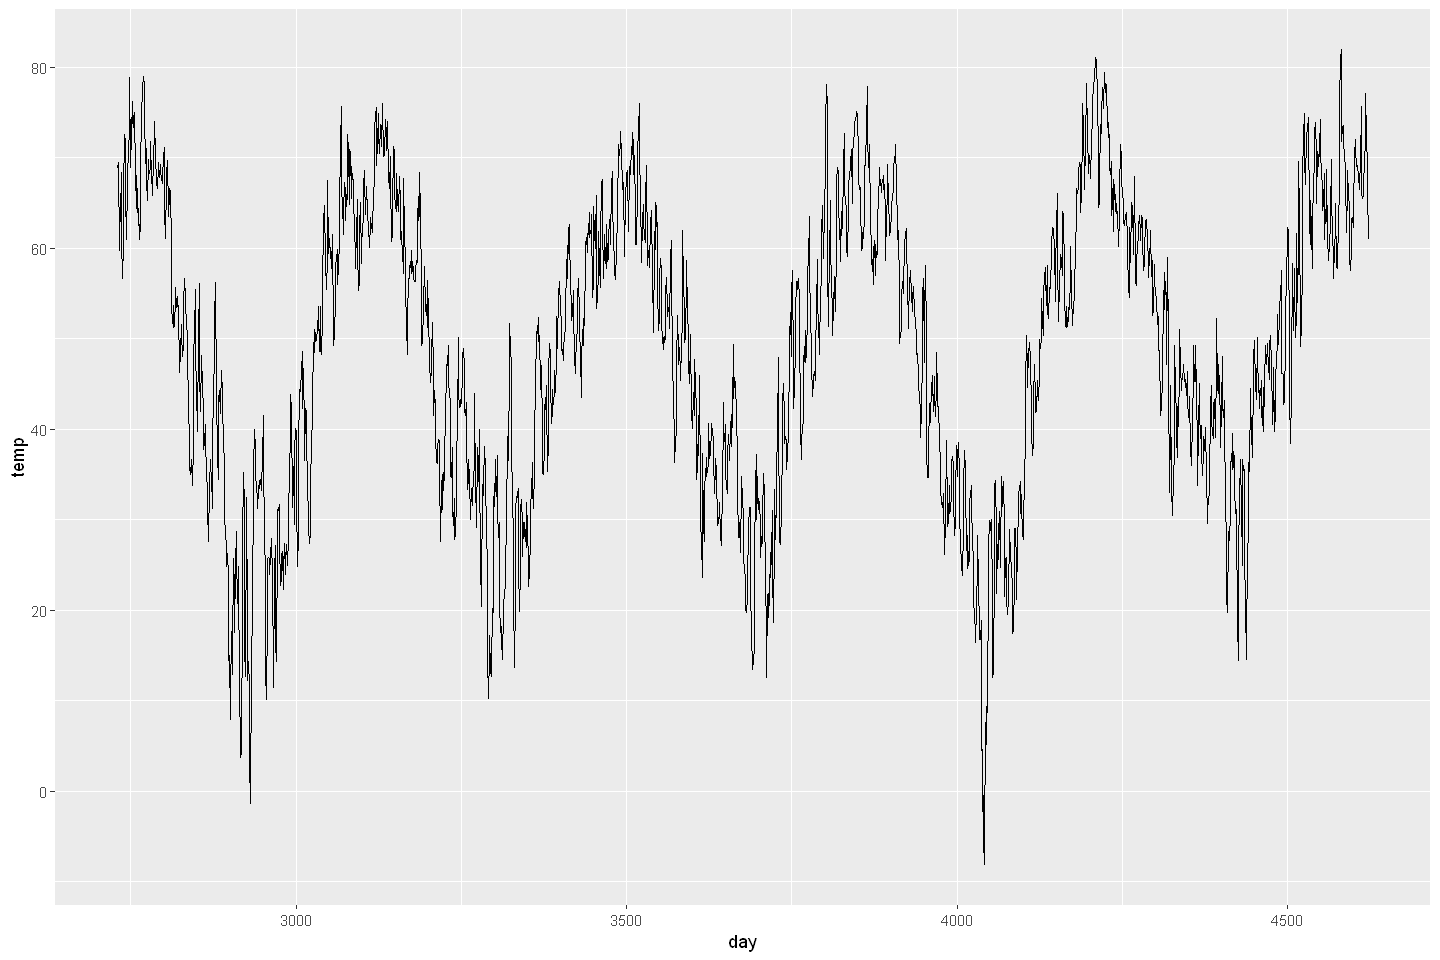

In [97]:
ggplot() + geom_line(aes(x=day, y=temp))

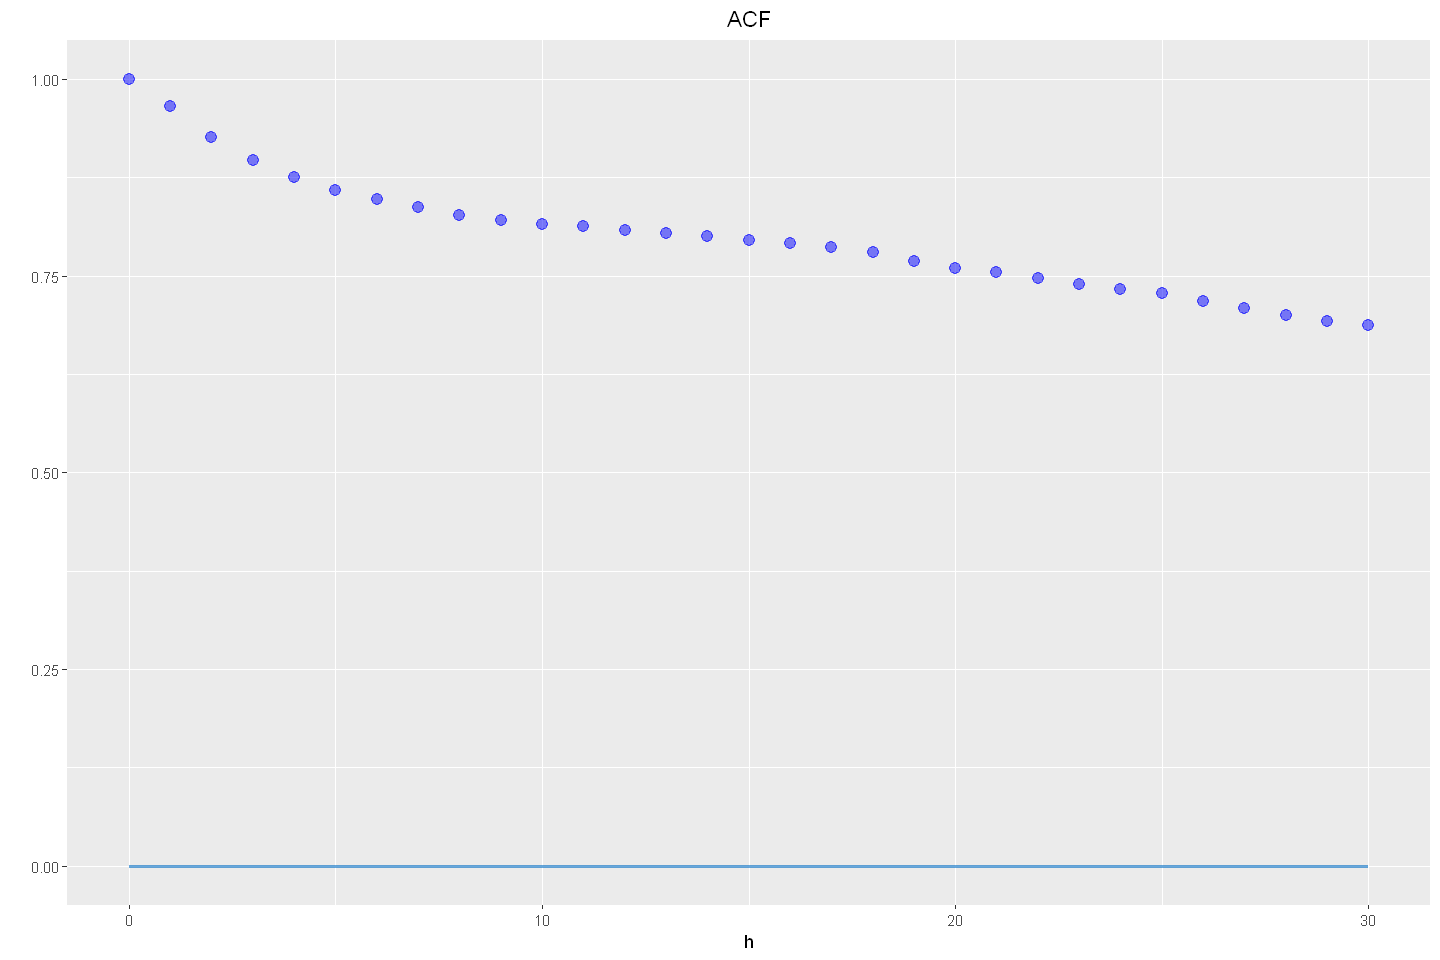

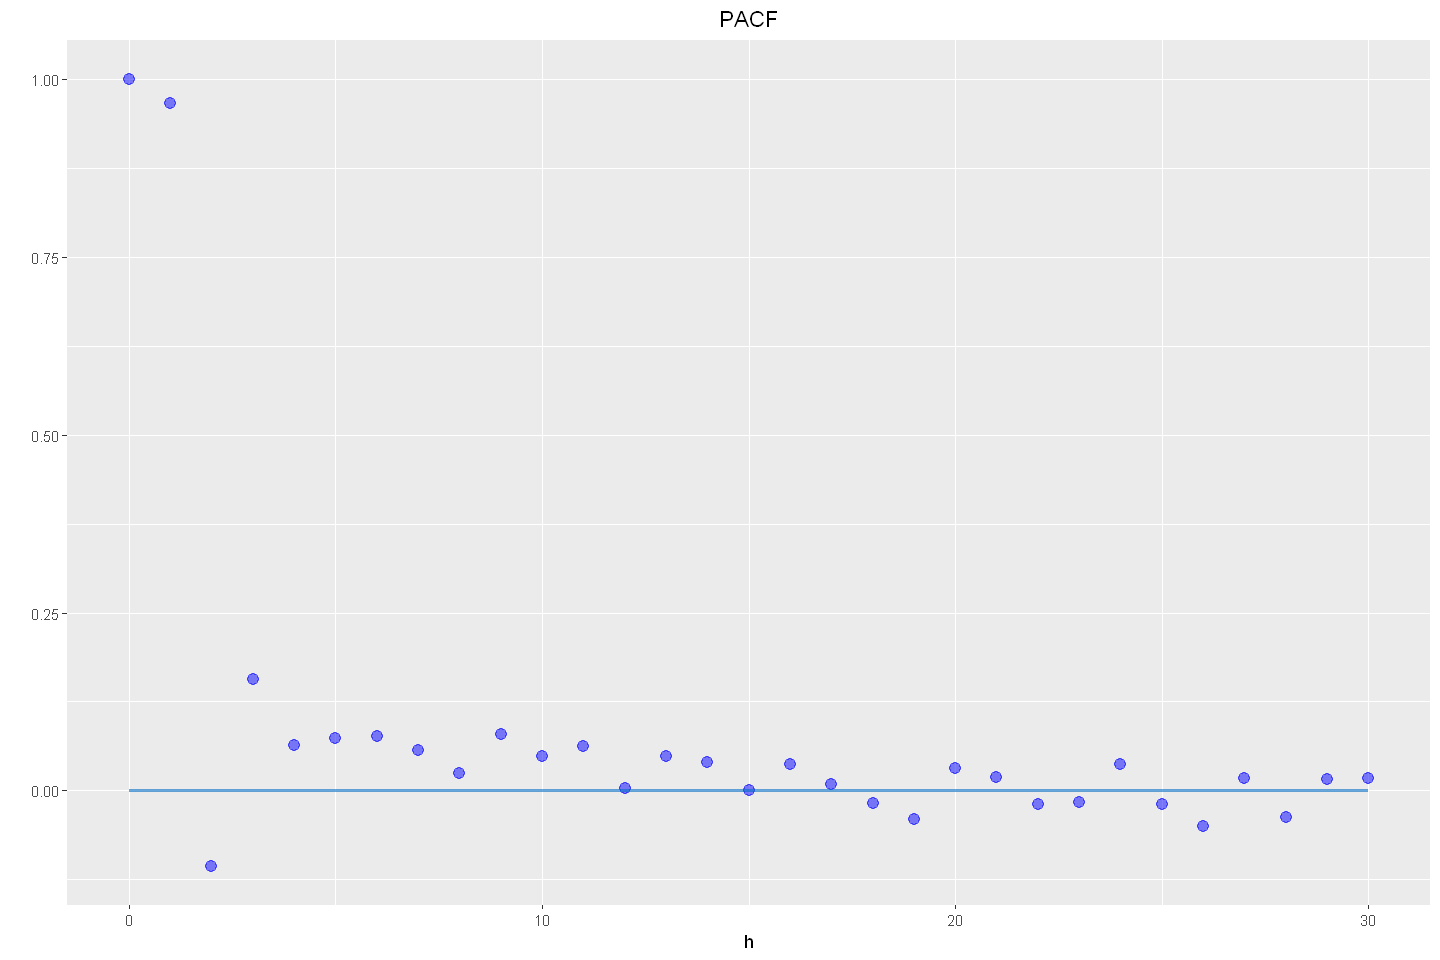

In [140]:
cor_plot(temp)
cor_plot(temp, "pacf")

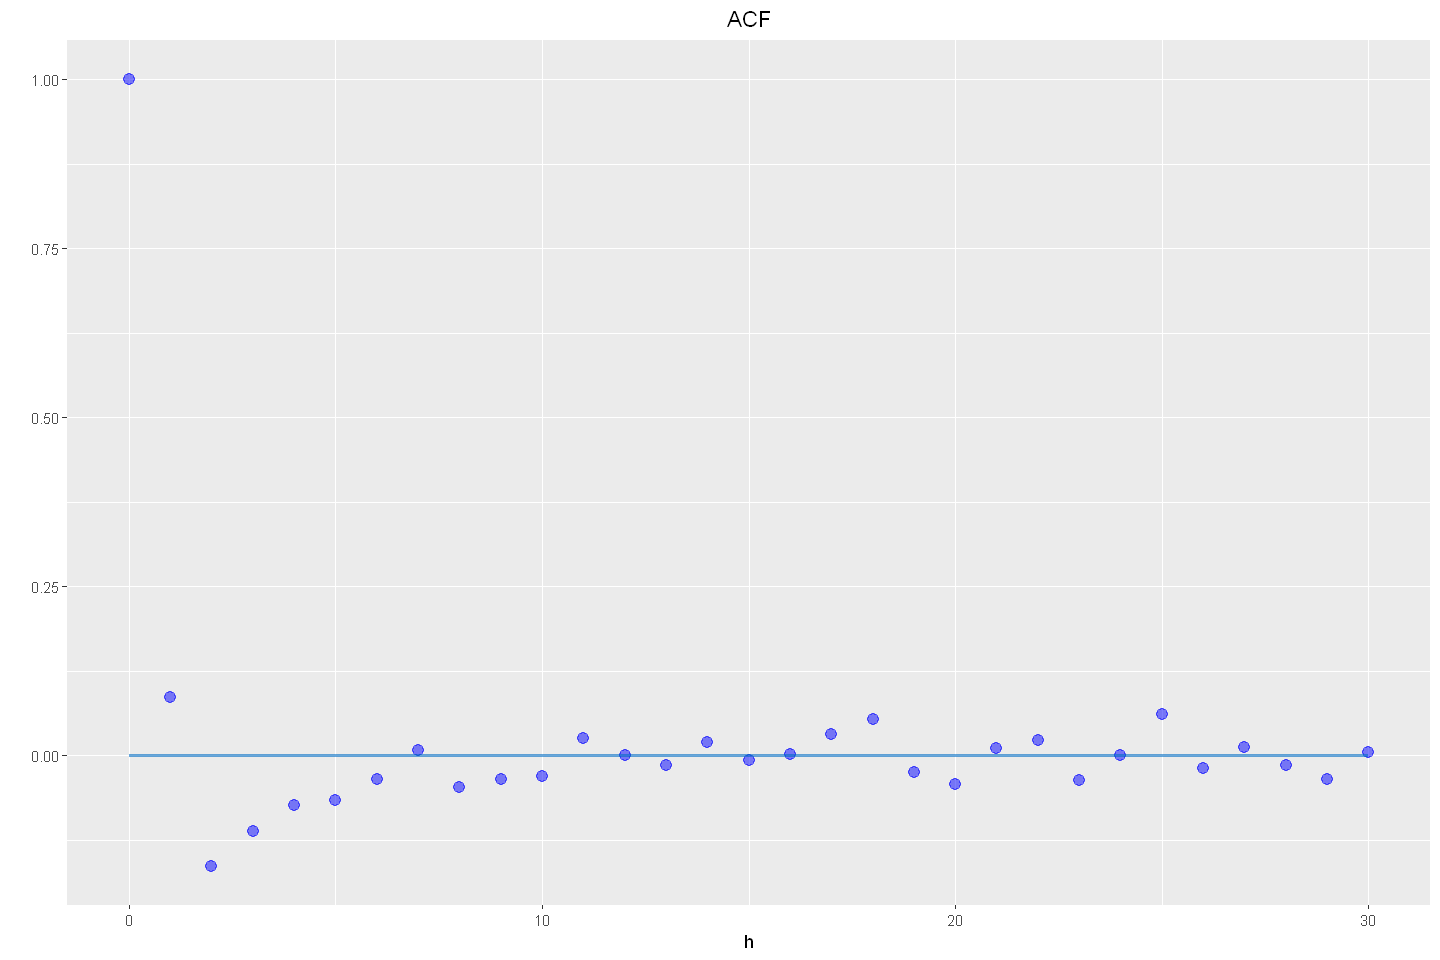

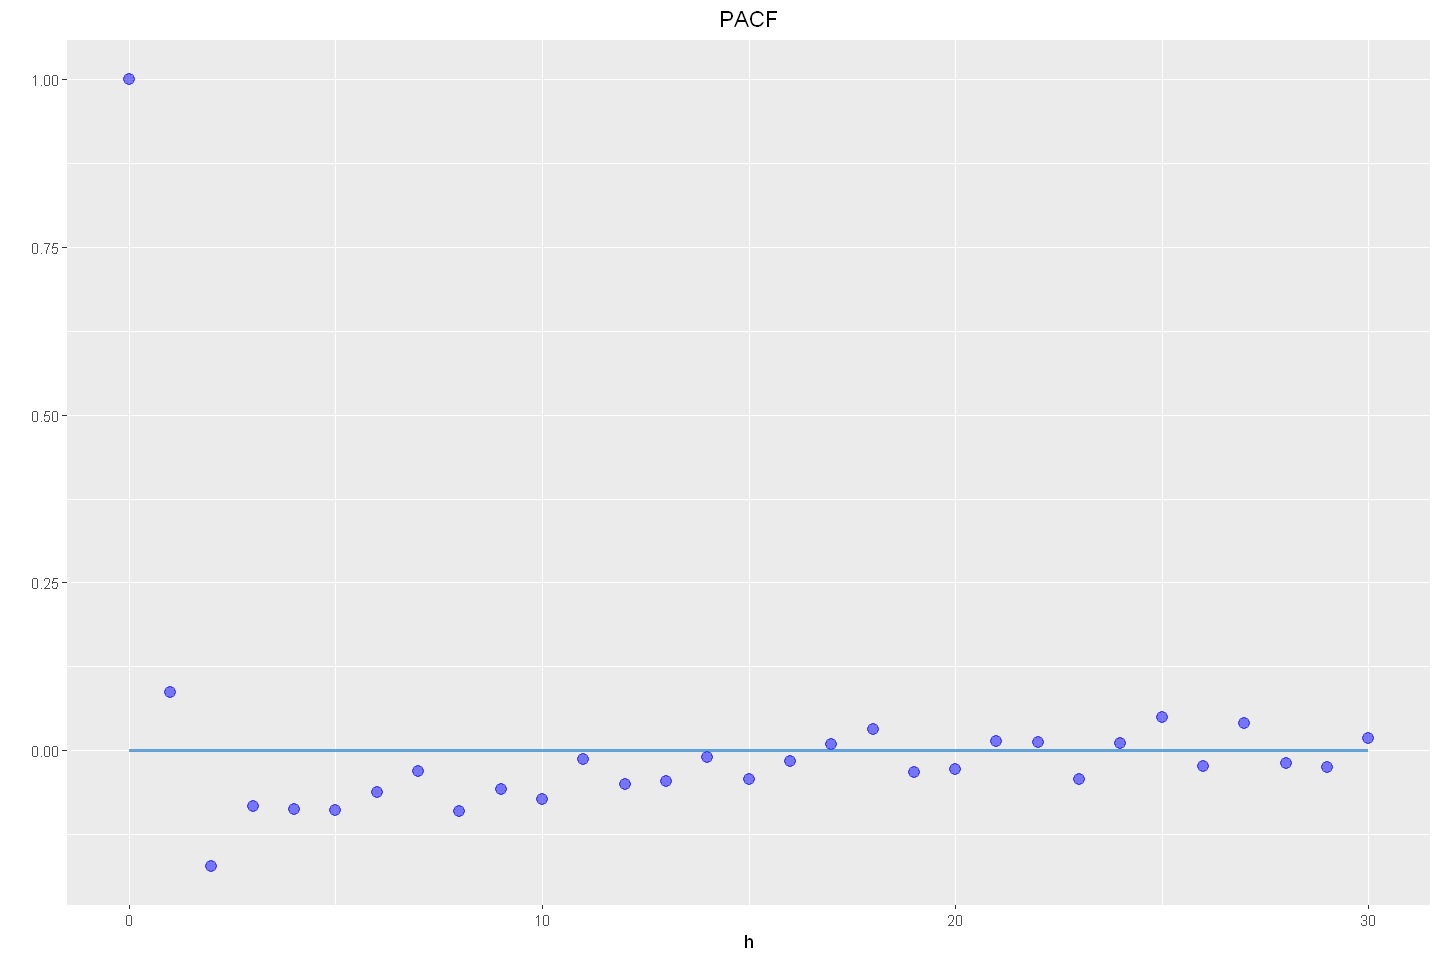

In [141]:
temp_diff <- diff(temp)
cor_plot(temp_diff)
cor_plot(temp_diff, "pacf")

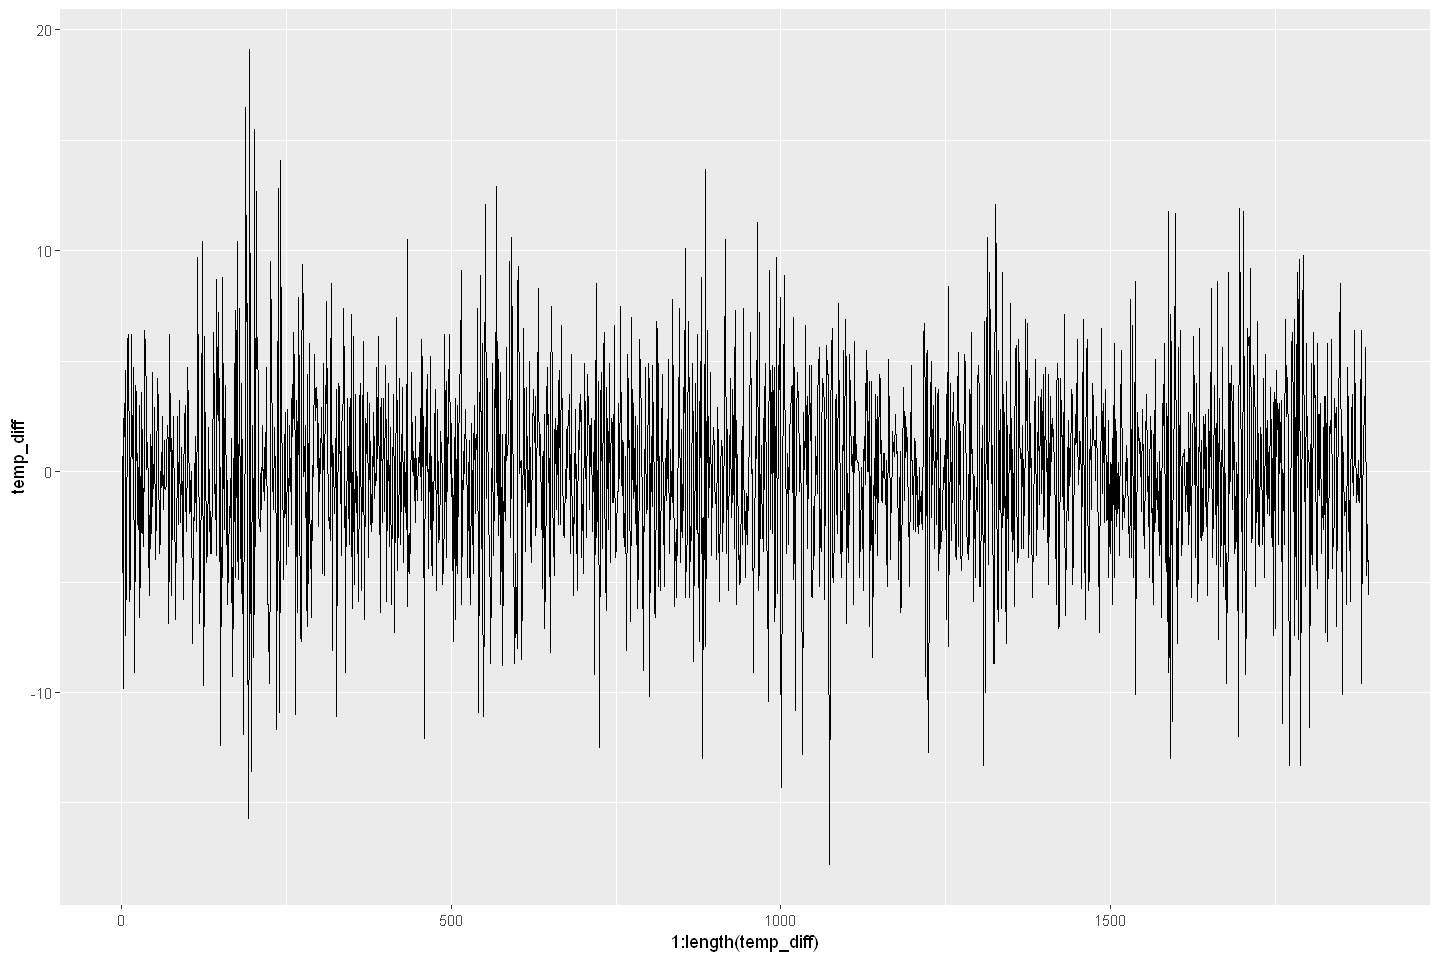

In [99]:
ggplot() + geom_line(aes(1:length(temp_diff), temp_diff))

In [100]:
p_max <- 5
q_max <- 5

AIC_values <- matrix(nrow=p_max+1, ncol=q_max+1)

for (p in 0:p_max){
  for (q in 0:q_max){
    model <- arima(temp_diff, order = c(p, 0, q))
    AIC_values[p+1, q+1] <- model$aic
  }
}

indices <- which(AIC_values == min(AIC_values), arr.ind = TRUE)
p_found <- indices[1]-1
q_found <- indices[2]-1
c(p_found, q_found)

Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"


[1] 3 4

In [57]:
model <- arima(temp_diff, order = c(3, 0, 4))

print(model)

coefficients <- model$coef
coef_sigma2 <- model$sigma2
AIC_value <- model$aic
residuals <- model$residuals


Call:
arima(x = temp_diff, order = c(3, 0, 4))

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
"wyprodukowano wartości NaN"


         ar1     ar2     ar3     ma1      ma2    ma3     ma4  intercept
      0.7874  0.8668  -0.664  -0.747  -1.1119  0.655  0.2111     0.0030
s.e.     NaN     NaN     NaN     NaN      NaN    NaN     NaN     0.0679

sigma^2 estimated as 16.39:  log likelihood = -5330.52,  aic = 10679.05


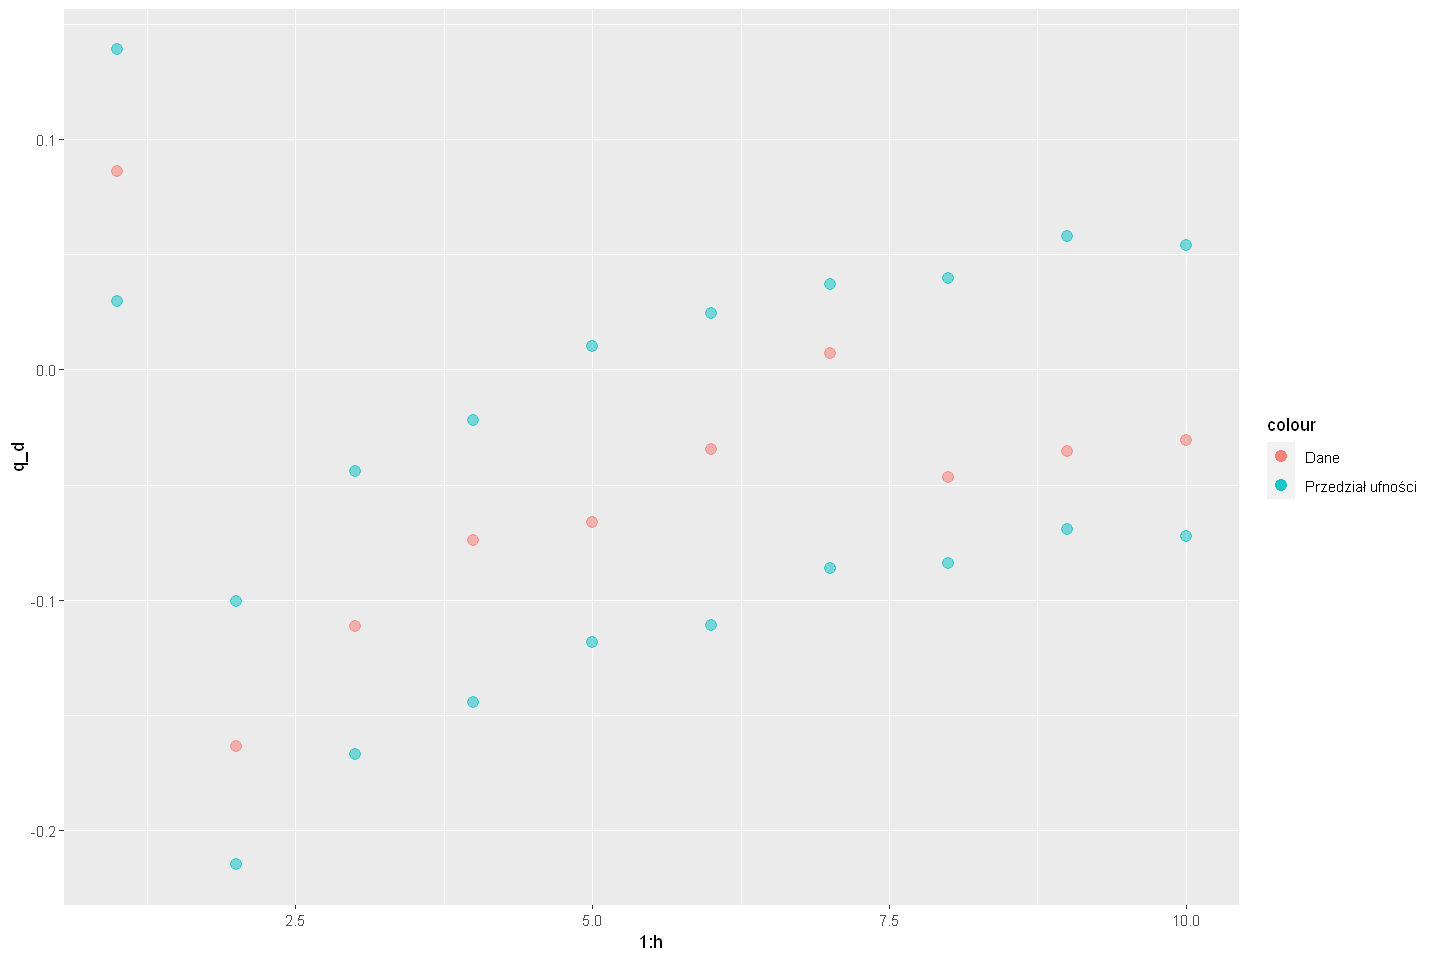

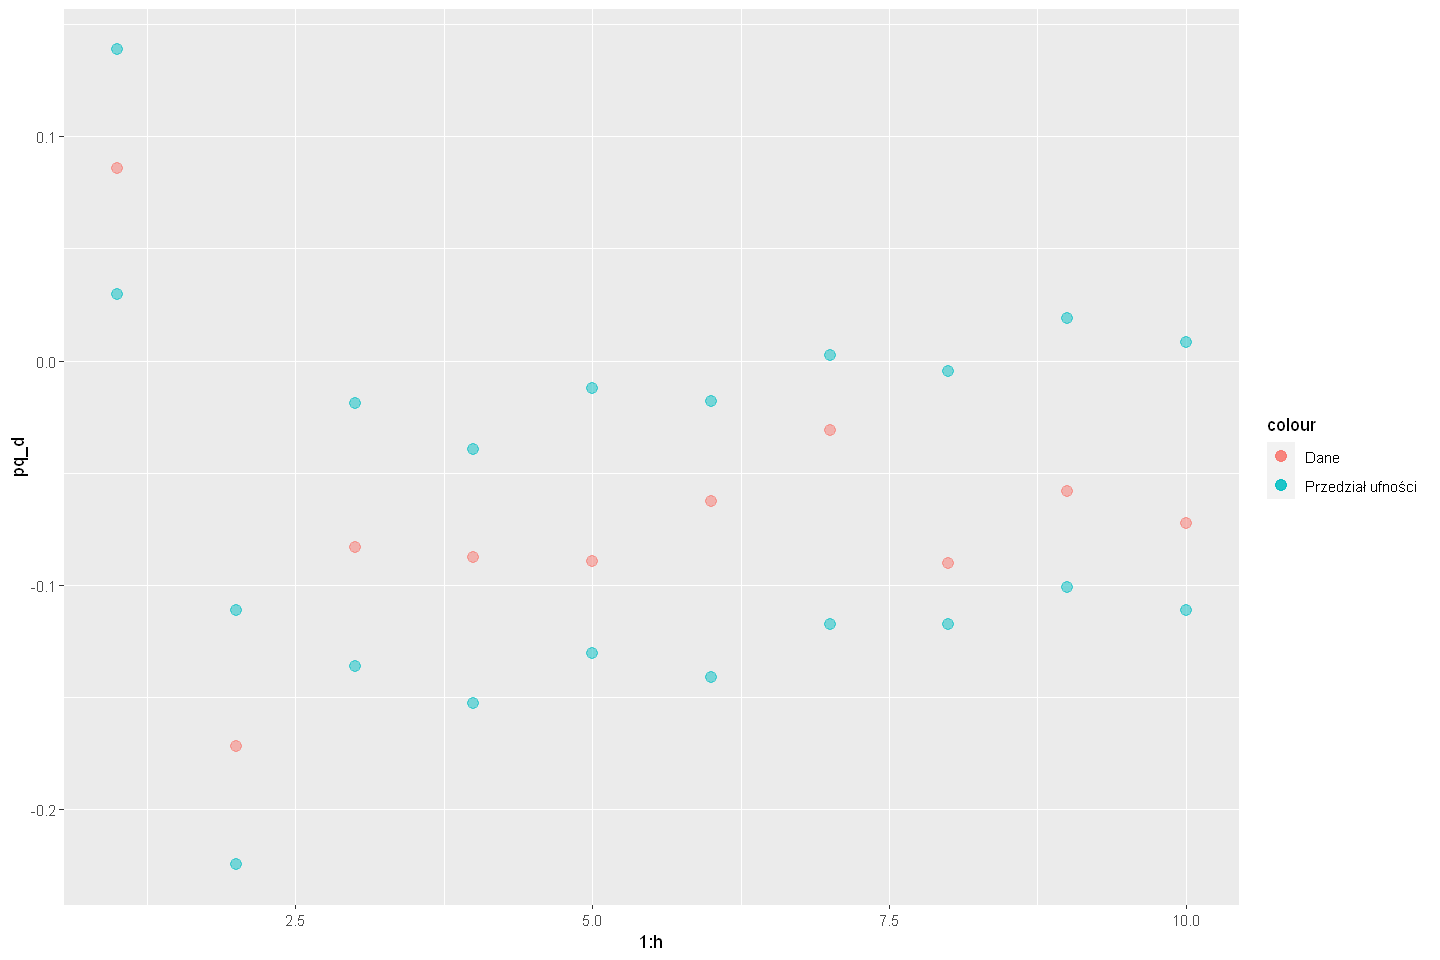

In [153]:
M <- 1000
h <- 10
alpha <- 0.05

cor_matrix <- matrix(0, nrow = M, ncol = h)
pcor_matrix <- matrix(0, nrow = M, ncol = h)

for (j in 1:M){
    
    Xt <- arima.sim(model = list(order = c(3, 0, 4), ar = c(0.7874, 0.8668, -0.664), ma = c(-0.747, -1.1119, 0.655, 0.2111)), n = 1000, sd = sqrt(16.39))

    cors <- acf(Xt, lag.max=h, plot=FALSE)$acf
    cors <- cors[2:(length(cors))]
    cor_matrix[j,] <- cors

    pcors <- pacf(Xt, lag.max=h, plot=FALSE)$acf
    pcor_matrix[j,] <- pcors
}

q_d <- c()
q_g <- c()
pq_d <- c()
pq_g <- c()
for (i in 1:h){
    q_d <- append(q_d, quantile(cor_matrix[,i], alpha/2))
    q_g <- append(q_g, quantile(cor_matrix[,i], 1 - alpha/2))
    pq_d <- append(pq_d, quantile(pcor_matrix[,i], alpha/2))
    pq_g <- append(pq_g, quantile(pcor_matrix[,i], 1 - alpha/2))
}

cors <- acf(temp_diff, plot=FALSE, lag.max=h)$acf
cors <- cors[2:(length(cors))]
ggplot() + 
  geom_point(aes(1:h, q_d, col="Przedział ufności"), size=3, alpha=0.5) +
  geom_point(aes(1:h, q_g, col="Przedział ufności"), size=3, alpha=0.5) +
  geom_point(aes(1:h, cors, col="Dane"), size=3, alpha=0.5)

pcors <- pacf(temp_diff, plot=FALSE, lag.max=h)$acf
ggplot() + 
  geom_point(aes(1:h, pq_d, col="Przedział ufności"), size=3, alpha=0.5) +
  geom_point(aes(1:h, pq_g, col="Przedział ufności"), size=3, alpha=0.5) +
  geom_point(aes(1:h, pcors, col="Dane"), size=3, alpha=0.5)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


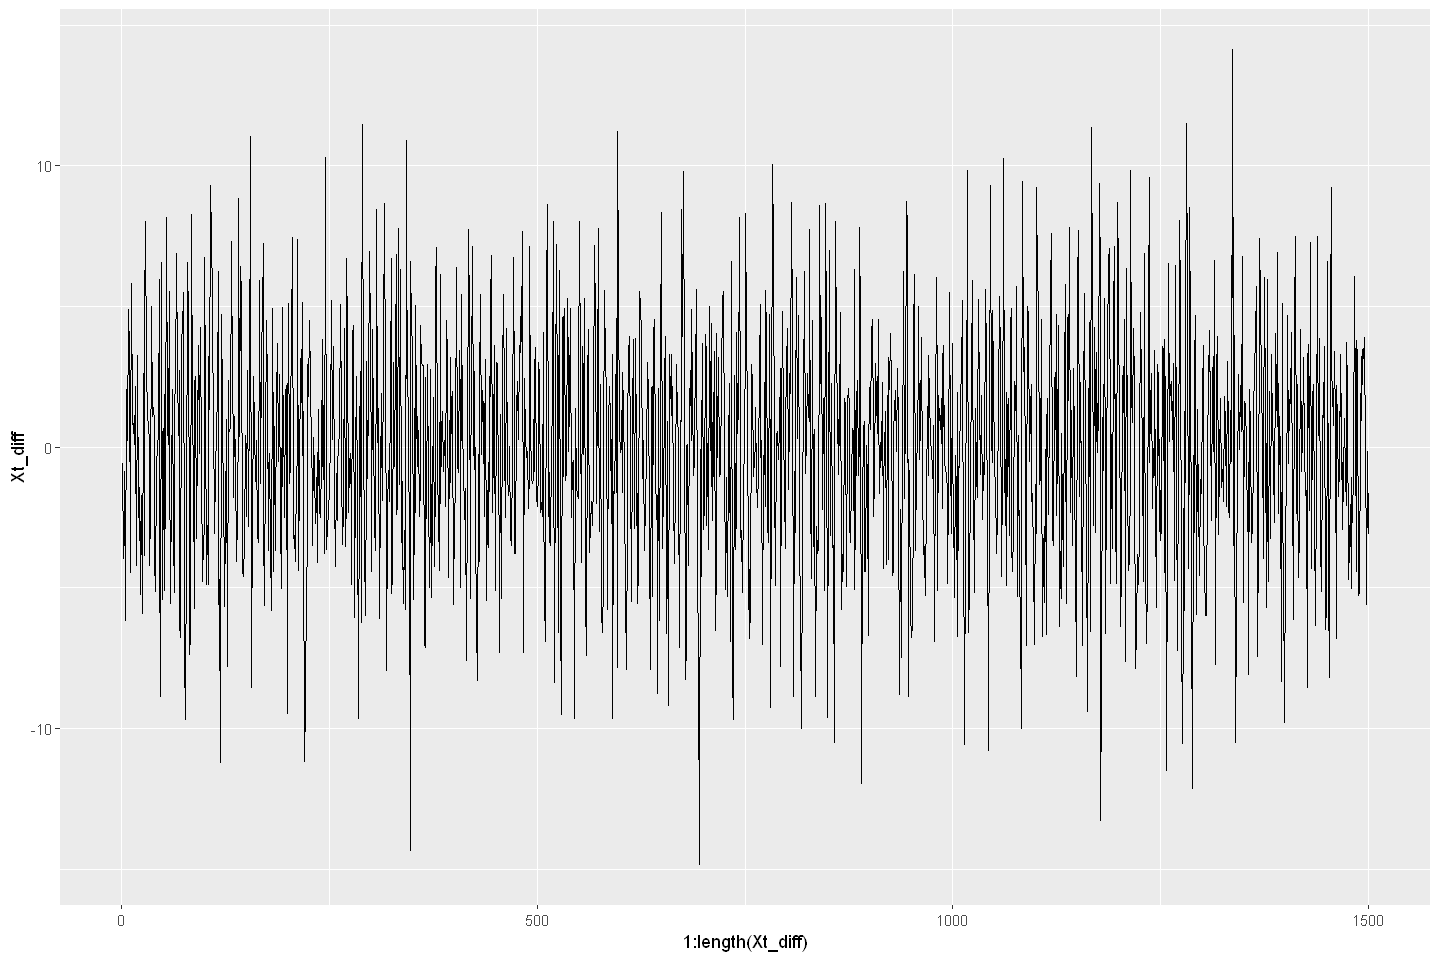

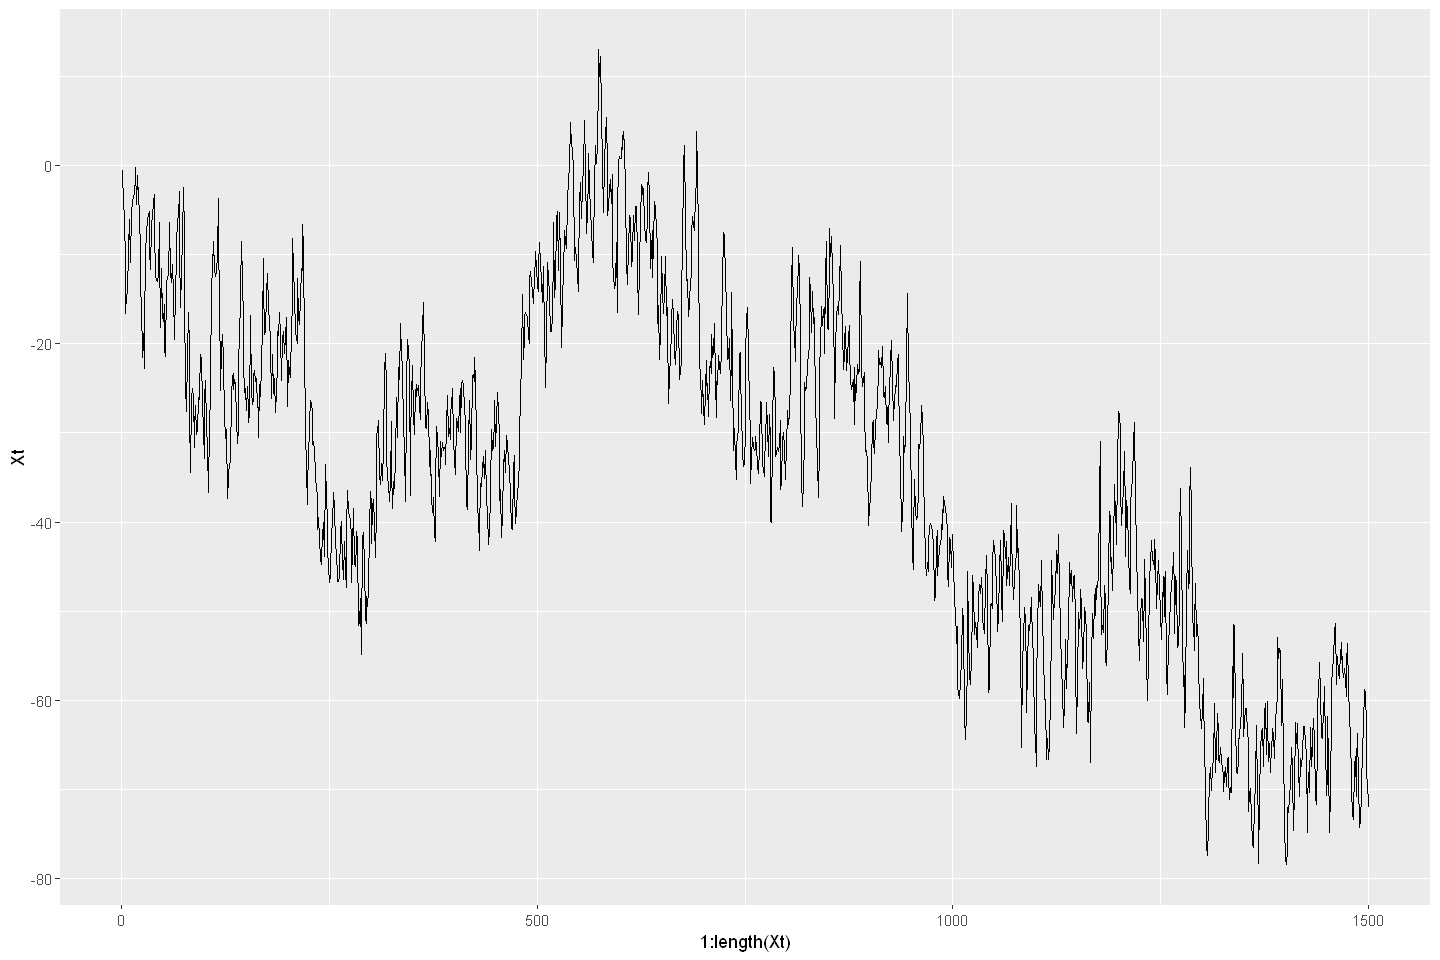

In [170]:
Xt_diff <- arima.sim(model = list(order = c(3, 0, 4), ar = c(0.7874, 0.8668, -0.664), ma = c(-0.747, -1.1119, 0.655, 0.2111)), n = 1500, sd = sqrt(16.39))
ggplot() + geom_line(aes(1:length(Xt_diff), Xt_diff))

Xt <- cumsum(Xt_diff)
ggplot() + geom_line(aes(1:length(Xt), Xt))